
## Basic walk through the logistic regression problem
example taken from </br>
 http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/12_logistic_regression.ipynb)
<br>
a more mathematical approach here:
http://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression/


### Data:

Glass information found in the crime scene. <br>

The study of classification of types of glass was motivated by 
criminological investigation.  At the scene of the crime, the glass left
can be used as evidence...if it is correctly identified!

Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   ...
   
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
<br>

#### We twist a bit the problem for the needs of the logistic reg. we create a binary dependent variable:
Dependent bar = glass_type => multivariate problem<br>
We convert it to Dichotomus  (household variable)

In [25]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values(by='al', inplace=True)
glass.head()
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


## Task: predicting household using al

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,u'household')

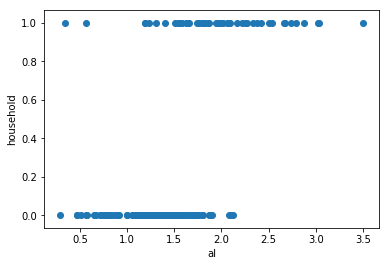

In [27]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [28]:
# Lets see if we deal with an imbalanced problem..
glass['household'].value_counts()

0    163
1     51
Name: household, dtype: int64

## Solving problem using regression

Text(0,0.5,u'household')

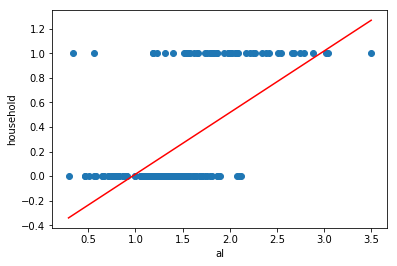

In [29]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [30]:
# Because eventually we need to decide a class (0 or 1) we need a cutoff value
# cutoff value can be .5 since ~halpf of data are below and ~half of data above 
CUTTOFF = 0.5
test_values = [.5, 1., 3.]
for i in test_values:
    print "if al = ", i, " is household = ", 0.5 < linreg.predict(i)


if al =  0.5  is household =  [False]
if al =  1.0  is household =  [False]
if al =  3.0  is household =  [ True]


In [31]:
import numpy as np
# Predict for all household values
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0


Text(0,0.5,u'household')

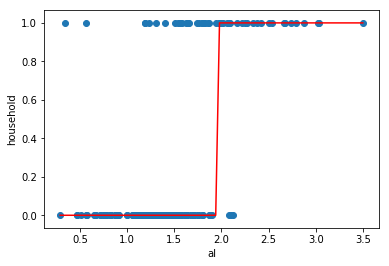

In [32]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

## Solving problem using Logistic Regression

Text(0,0.5,u'household')

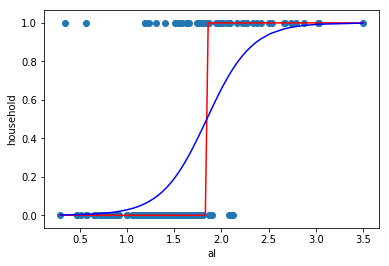

In [35]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)

# store the predicted class
glass['household_pred_class'] = logreg.predict(X)

# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.plot(glass.al, glass.household_pred_prob, color='blue')
plt.xlabel('al')
plt.ylabel('household')

In [37]:
glass['household_pred_class_logistic_reg'] = glass.household_pred_class
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class,household_pred_prob,household_pred_class_logistic_reg
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0,0.001499,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0,0.001847,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0,0.003176,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0,0.003176,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0,0.003752,0
